C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\282185097.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['15_day_bin'] = semester_data['Tarih'].dt.floor('15D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\282185097.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['15_day_bin'] = semester_data['Tarih'].dt.floor('15D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\282185097.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<Figure size 1500x800 with 0 Axes>

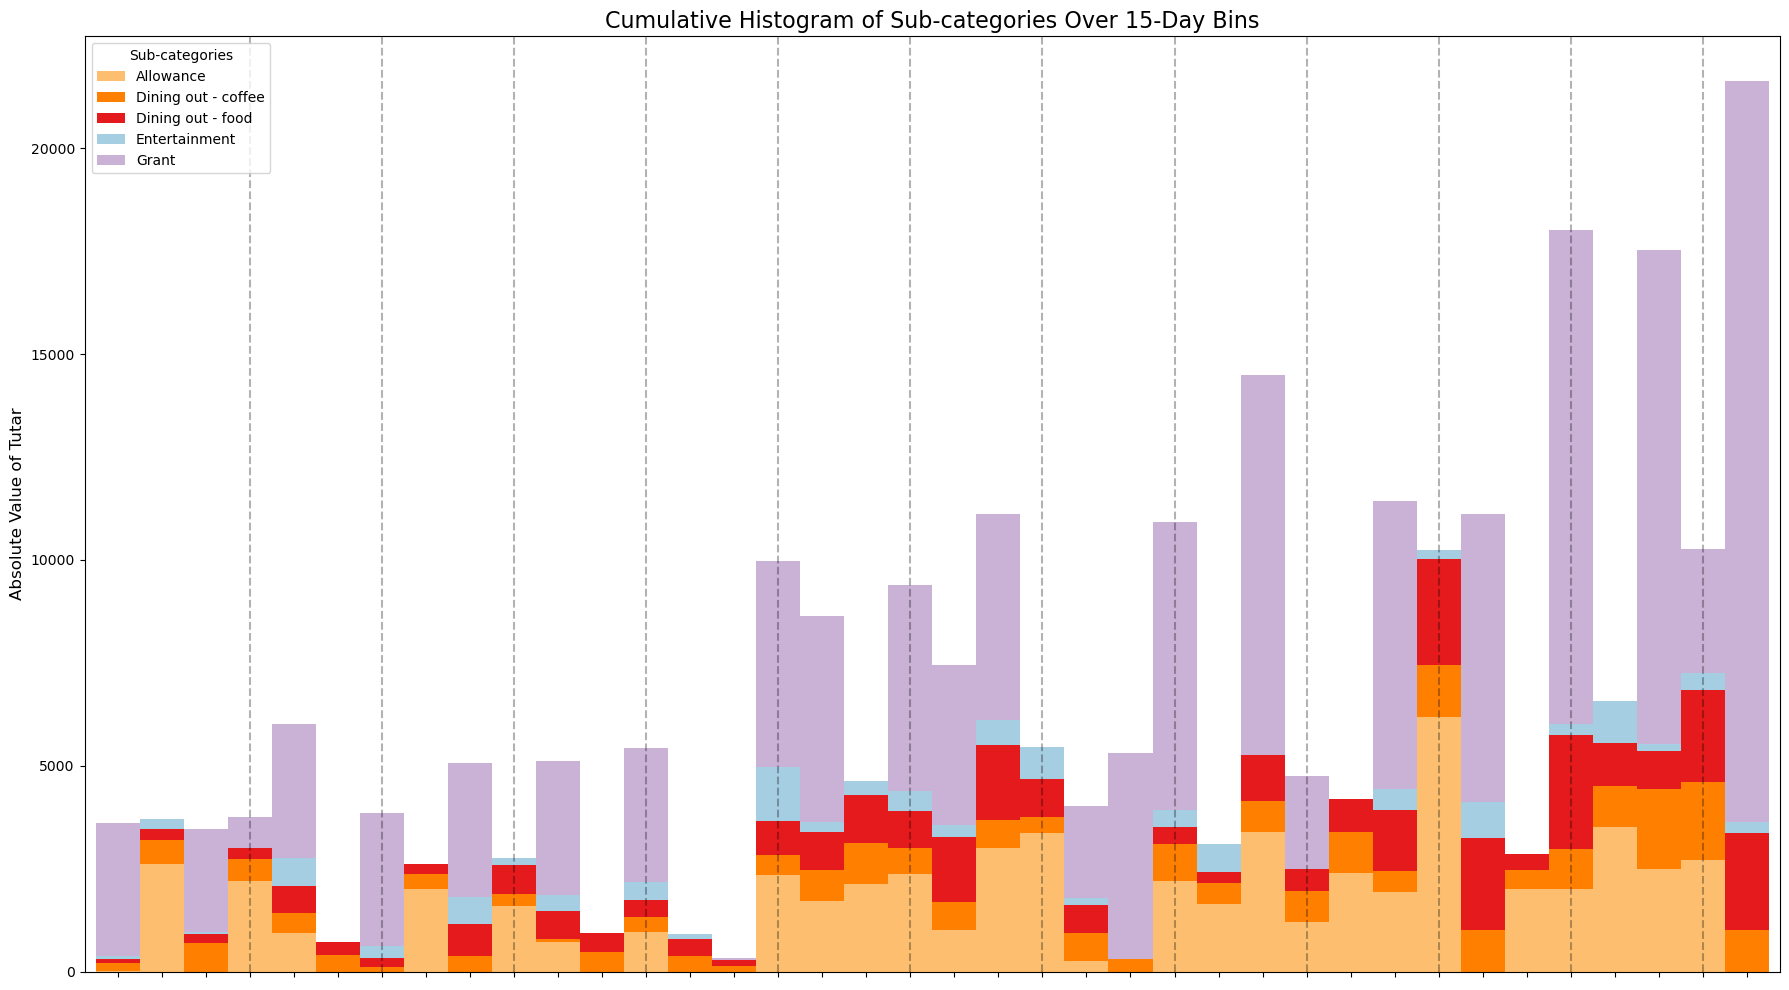

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_dayOfWeek.csv'
data = pd.read_csv(file_path)

# Parse the date and preprocess
data['Tarih'] = pd.to_datetime(data['Tarih'], errors='coerce')
data['Tutar'] = data['Tutar'].abs()

# Manually add favorite categories
favorite_categories = [
    'Entertainment', 'Dining out - coffee', 'Dining out - food', 
    'Market - grocery', 'Grant', 'Allowance'
]
filtered_data = data[data['Sub-category'].isin(favorite_categories)]

# Add missing categories manually
for category in favorite_categories:
    if category not in filtered_data['Sub-category'].unique():
        placeholder_row = {
            'Tarih': pd.NaT,
            'Tutar': 0.0,
            'Sub-category': category,
        }
        filtered_data = pd.concat([filtered_data, pd.DataFrame([placeholder_row])], ignore_index=True)

# Define semester date ranges
semesters = [
    ("2022-11-01", "2023-01-21"),
    ("2023-02-16", "2023-06-14"),
    ("2023-10-01", "2024-01-27"),
    ("2024-02-15", "2024-06-14"),
    ("2024-09-25", "2024-12-14")
]

# Create bins of 15 days for each semester and calculate cumulative sums per sub-category
semester_bins = []
for start, end in semesters:
    semester_data = filtered_data[(filtered_data['Tarih'] >= start) & (filtered_data['Tarih'] <= end)]
    semester_data['15_day_bin'] = semester_data['Tarih'].dt.floor('15D')
    grouped = semester_data.groupby(['15_day_bin', 'Sub-category'])['Tutar'].sum().unstack(fill_value=0)
    semester_bins.append(grouped)

# Combine all semester data into one DataFrame
all_semesters_data = pd.concat(semester_bins).sort_index()

# Define a new custom color palette for better differentiation
new_custom_colors = {
    'Entertainment': '#a6cee3',  # Light Blue
    'Dining out - coffee': '#ff7f00',  # Orange
    'Dining out - food': '#e41a1c',  # Red
    'Grant': '#cab2d6',  # Light Purple
    'Market - grocery': '#cab2d6',  # Light Purple
    'Allowance': '#fdbf6f',  # Light Orange
}

# Plotting the cumulative histogram with updated aesthetics
plt.figure(figsize=(15, 8))
ax = all_semesters_data.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 10),
    width=1.0,
    color=[new_custom_colors.get(col, '#7f7f7f') for col in all_semesters_data.columns],
    legend=True
)

# Remove x-axis labels (bin explanation)
ax.set_xticklabels([])

# Add vertical transparent lines for every 3 bins
for i in range(3, len(all_semesters_data), 3):
    plt.axvline(x=i, color='black', linestyle='--', alpha=0.3)

# Set white background for consistency
plt.gca().set_facecolor('white')

# Customizing the plot
plt.title('Cumulative Histogram of Sub-categories Over 15-Day Bins', fontsize=16)
plt.ylabel('Absolute Value of Tutar', fontsize=12)
plt.xlabel('')  # No label for x-axis
plt.legend(title='Sub-categories', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\1377655472.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['15_day_bin'] = semester_data['Tarih'].dt.floor('15D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\1377655472.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['15_day_bin'] = semester_data['Tarih'].dt.floor('15D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\1377655472.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<Figure size 1500x800 with 0 Axes>

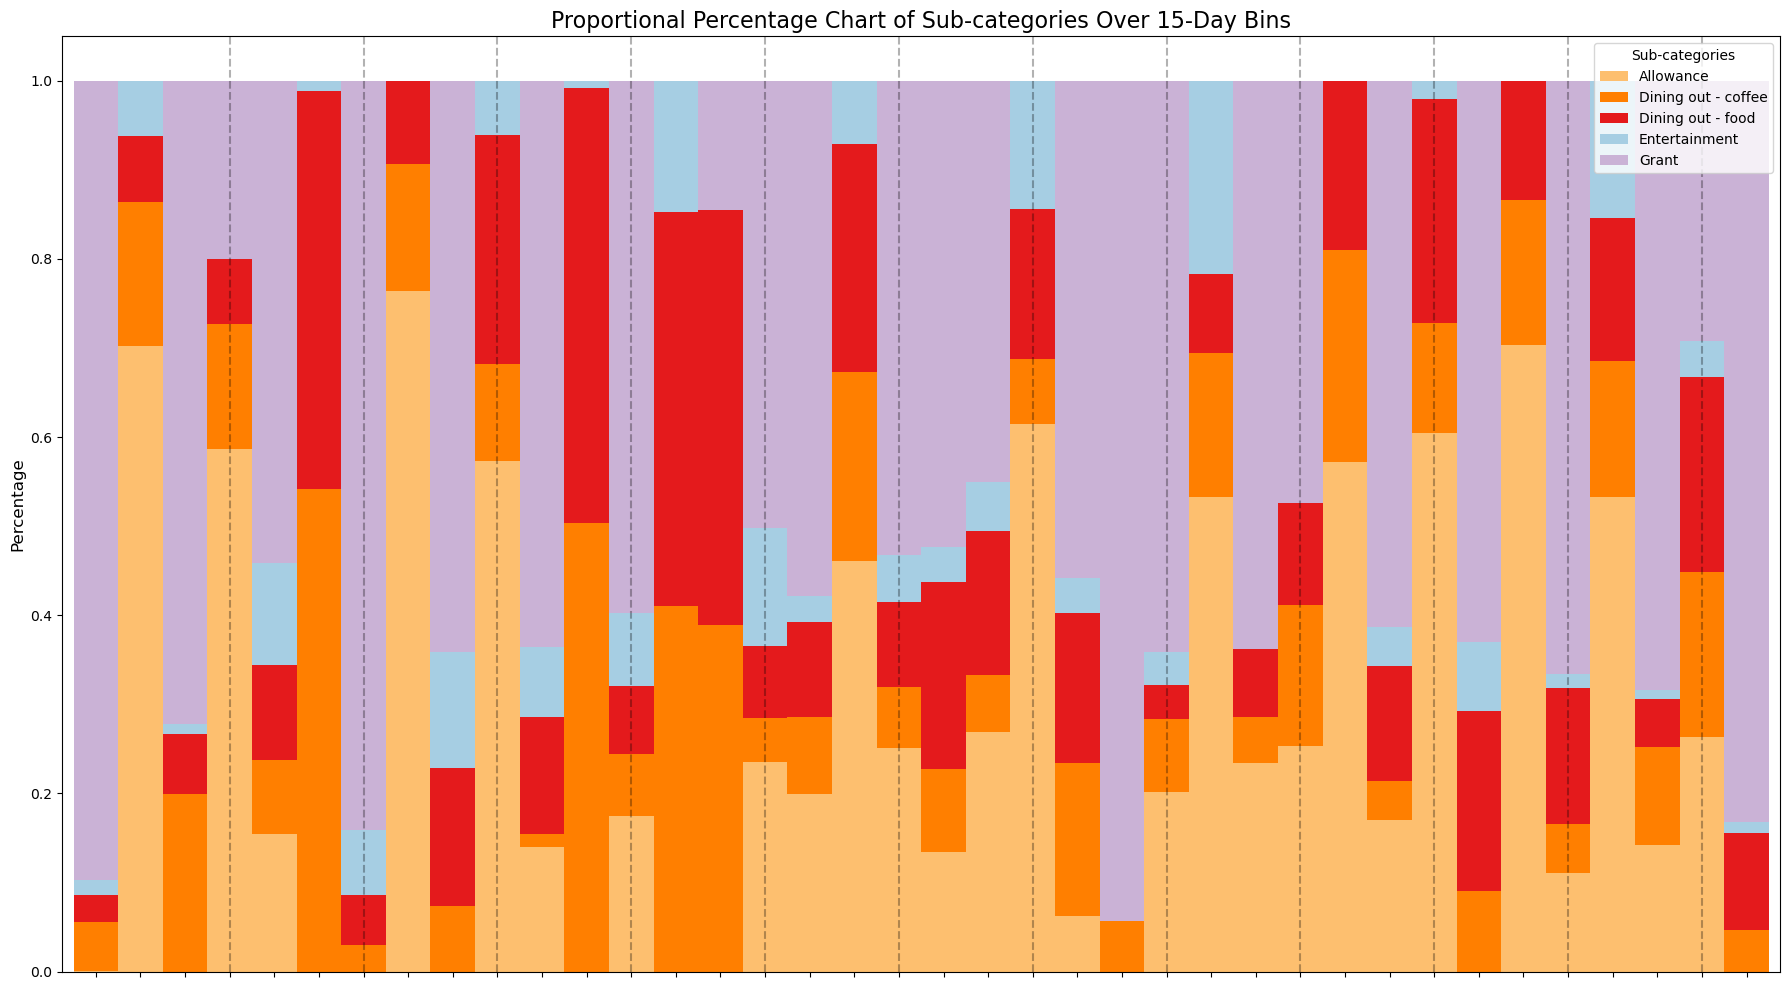

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_dayOfWeek.csv'
data = pd.read_csv(file_path)

# Parse the date and preprocess
data['Tarih'] = pd.to_datetime(data['Tarih'], errors='coerce')
data['Tutar'] = data['Tutar'].abs()

# Manually add favorite categories
favorite_categories = [
    'Entertainment', 'Dining out - coffee', 'Dining out - food', 
    'Market - grocery', 'Grant', 'Allowance'
]
filtered_data = data[data['Sub-category'].isin(favorite_categories)]

# Add missing categories manually
for category in favorite_categories:
    if category not in filtered_data['Sub-category'].unique():
        placeholder_row = {
            'Tarih': pd.NaT,
            'Tutar': 0.0,
            'Sub-category': category,
        }
        filtered_data = pd.concat([filtered_data, pd.DataFrame([placeholder_row])], ignore_index=True)

# Define semester date ranges
semesters = [
    ("2022-11-01", "2023-01-21"),
    ("2023-02-16", "2023-06-14"),
    ("2023-10-01", "2024-01-27"),
    ("2024-02-15", "2024-06-14"),
    ("2024-09-25", "2024-12-14")
]

# Create bins of 15 days for each semester and calculate cumulative sums per sub-category
semester_bins = []
for start, end in semesters:
    semester_data = filtered_data[(filtered_data['Tarih'] >= start) & (filtered_data['Tarih'] <= end)]
    semester_data['15_day_bin'] = semester_data['Tarih'].dt.floor('15D')
    grouped = semester_data.groupby(['15_day_bin', 'Sub-category'])['Tutar'].sum().unstack(fill_value=0)
    semester_bins.append(grouped)

# Combine all semester data into one DataFrame
all_semesters_data = pd.concat(semester_bins).sort_index()

# Normalize each row to represent percentages
all_semesters_percentage = all_semesters_data.div(all_semesters_data.sum(axis=1), axis=0)

# Define a new custom color palette for better differentiation
new_custom_colors = {
    'Entertainment': '#a6cee3',  # Light Blue
    'Dining out - coffee': '#ff7f00',  # Orange
    'Dining out - food': '#e41a1c',  # Red
    'Grant': '#cab2d6',  # Light Purple
    'Market - grocery': '#cab2d6',  # Light Purple
    'Allowance': '#fdbf6f',  # Light Orange
}

# Plotting the proportional percentage chart
plt.figure(figsize=(15, 8))
ax = all_semesters_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 10),
    width=1.0,
    color=[new_custom_colors.get(col, '#7f7f7f') for col in all_semesters_percentage.columns],
    legend=True
)

# Remove x-axis tick labels (bin explanation)
ax.set_xticklabels([])

# Add vertical transparent lines for every 3 bins
for i in range(3, len(all_semesters_percentage), 3):
    plt.axvline(x=i, color='black', linestyle='--', alpha=0.3)

# Set white background for consistency
plt.gca().set_facecolor('white')

# Customizing the plot
plt.title('Proportional Percentage Chart of Sub-categories Over 15-Day Bins', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('')  # No label for x-axis
plt.legend(title='Sub-categories', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\2718376447.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['30_day_bin'] = semester_data['Tarih'].dt.floor('30D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\2718376447.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['30_day_bin'] = semester_data['Tarih'].dt.floor('30D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\2718376447.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<Figure size 1500x800 with 0 Axes>

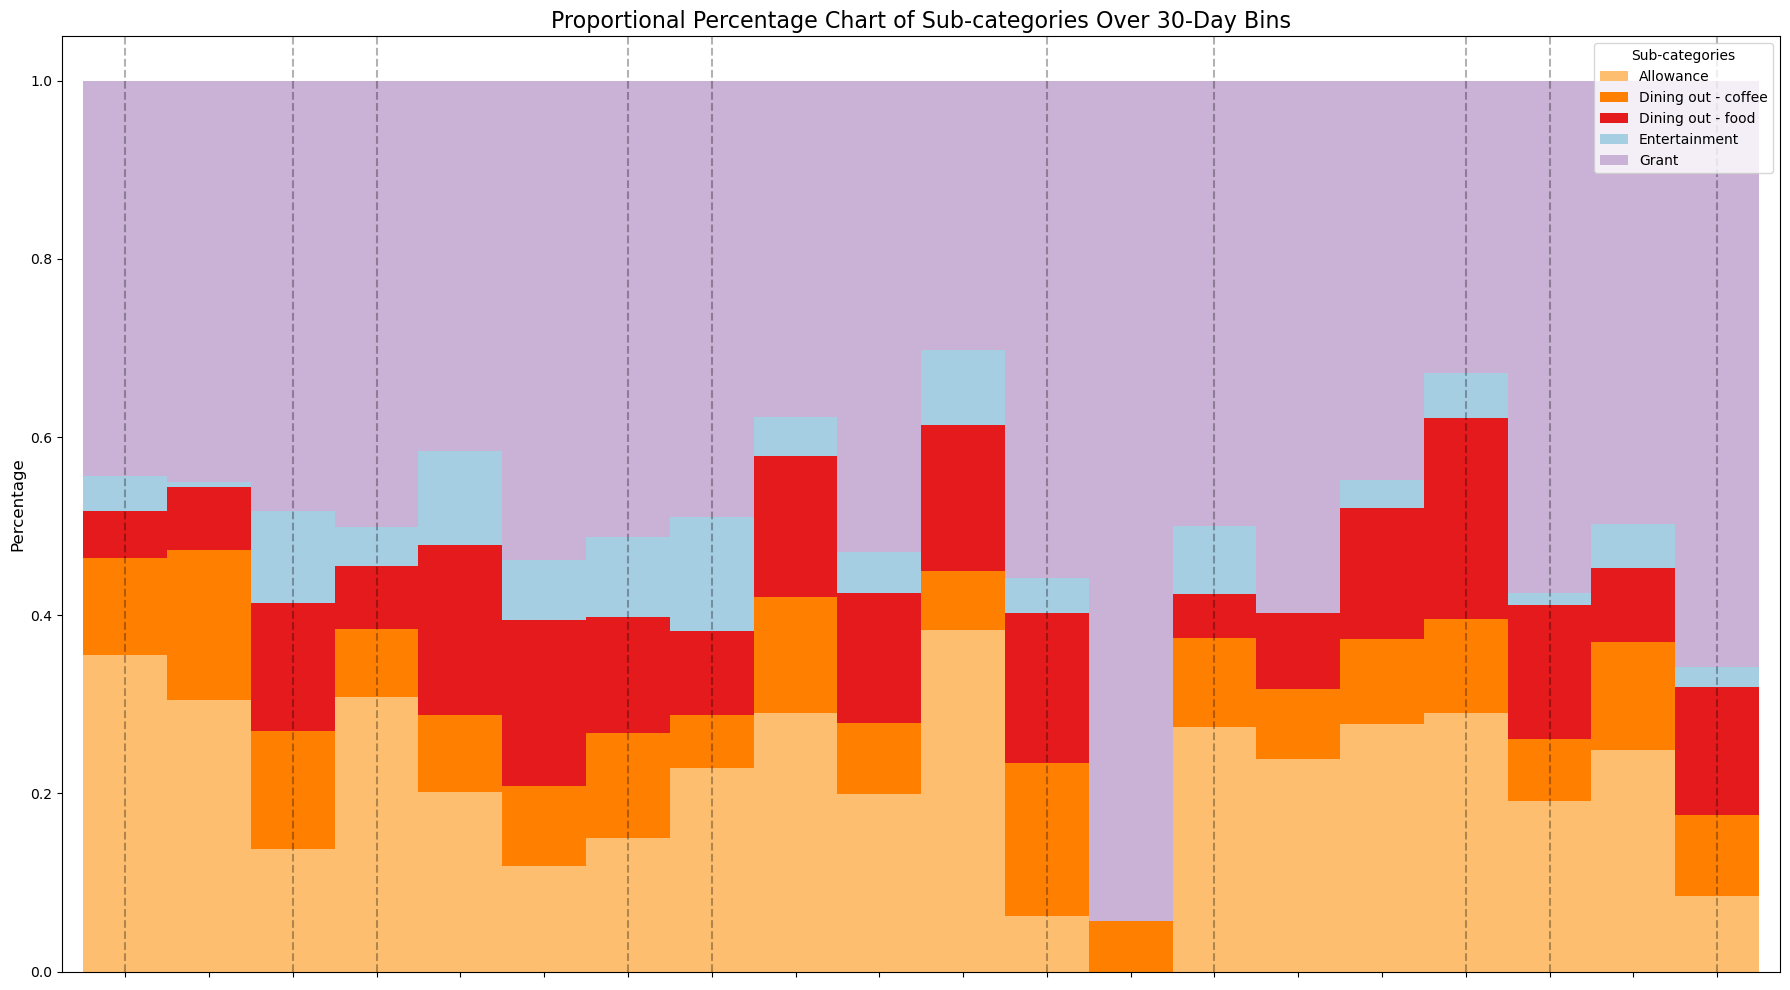

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_dayOfWeek.csv'
data = pd.read_csv(file_path)

# Parse the date and preprocess
data['Tarih'] = pd.to_datetime(data['Tarih'], errors='coerce')
data['Tutar'] = data['Tutar'].abs()

# Manually add favorite categories
favorite_categories = [
    'Entertainment', 'Dining out - coffee', 'Dining out - food', 
    'Market - grocery', 'Grant', 'Allowance'
]
filtered_data = data[data['Sub-category'].isin(favorite_categories)]

# Add missing categories manually
for category in favorite_categories:
    if category not in filtered_data['Sub-category'].unique():
        placeholder_row = {
            'Tarih': pd.NaT,
            'Tutar': 0.0,
            'Sub-category': category,
        }
        filtered_data = pd.concat([filtered_data, pd.DataFrame([placeholder_row])], ignore_index=True)

# Define semester date ranges
semesters = [
    ("2022-11-01", "2023-01-21"),
    ("2023-02-16", "2023-06-14"),
    ("2023-10-01", "2024-01-27"),
    ("2024-02-15", "2024-06-14"),
    ("2024-09-25", "2024-12-14")
]

# Create bins of 30 days for each semester and calculate cumulative sums per sub-category
semester_bins = []
for start, end in semesters:
    semester_data = filtered_data[(filtered_data['Tarih'] >= start) & (filtered_data['Tarih'] <= end)]
    semester_data['30_day_bin'] = semester_data['Tarih'].dt.floor('30D')
    grouped = semester_data.groupby(['30_day_bin', 'Sub-category'])['Tutar'].sum().unstack(fill_value=0)
    semester_bins.append(grouped)

# Combine all semester data into one DataFrame
all_semesters_data = pd.concat(semester_bins).sort_index()

# Reset the index to ensure uniqueness
all_semesters_data = all_semesters_data.reset_index()

# Normalize each row to represent percentages
all_semesters_percentage = all_semesters_data.iloc[:, 1:].div(all_semesters_data.iloc[:, 1:].sum(axis=1), axis=0)

# Define a new custom color palette for better differentiation
new_custom_colors = {
    'Entertainment': '#a6cee3',  # Light Blue
    'Dining out - coffee': '#ff7f00',  # Orange
    'Dining out - food': '#e41a1c',  # Red
    'Grant': '#cab2d6',  # Light Purple
    'Market - grocery': '#cab2d6',  # Light Purple
    'Allowance': '#fdbf6f',  # Light Orange
}

# Plotting the proportional percentage chart
plt.figure(figsize=(15, 8))
ax = all_semesters_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 10),
    width=1.0,
    color=[new_custom_colors.get(col, '#7f7f7f') for col in all_semesters_percentage.columns],
    legend=True
)

# Remove x-axis tick labels (bin explanation)
ax.set_xticklabels([])

# Add vertical transparent lines at semester start and end points
semester_boundaries = []

# Use the original bins for semester boundary positions
bins_datetime = pd.to_datetime(all_semesters_data['30_day_bin'])

# Find the nearest bin for each semester boundary
for start, end in semesters:
    start_boundary = (bins_datetime - pd.Timestamp(start)).abs().idxmin()
    end_boundary = (bins_datetime - pd.Timestamp(end)).abs().idxmin()
    semester_boundaries.extend([start_boundary, end_boundary])

# Add vertical lines for each semester boundary
for boundary in sorted(set(semester_boundaries)):
    plt.axvline(x=boundary, color='black', linestyle='--', alpha=0.3)

# Set white background for consistency
plt.gca().set_facecolor('white')

# Customizing the plot
plt.title('Proportional Percentage Chart of Sub-categories Over 30-Day Bins', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('')  # No label for x-axis
plt.legend(title='Sub-categories', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\1806753469.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['30_day_bin'] = semester_data['Tarih'].dt.floor('30D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\1806753469.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_data['30_day_bin'] = semester_data['Tarih'].dt.floor('30D')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2976\1806753469.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

<Figure size 1500x800 with 0 Axes>

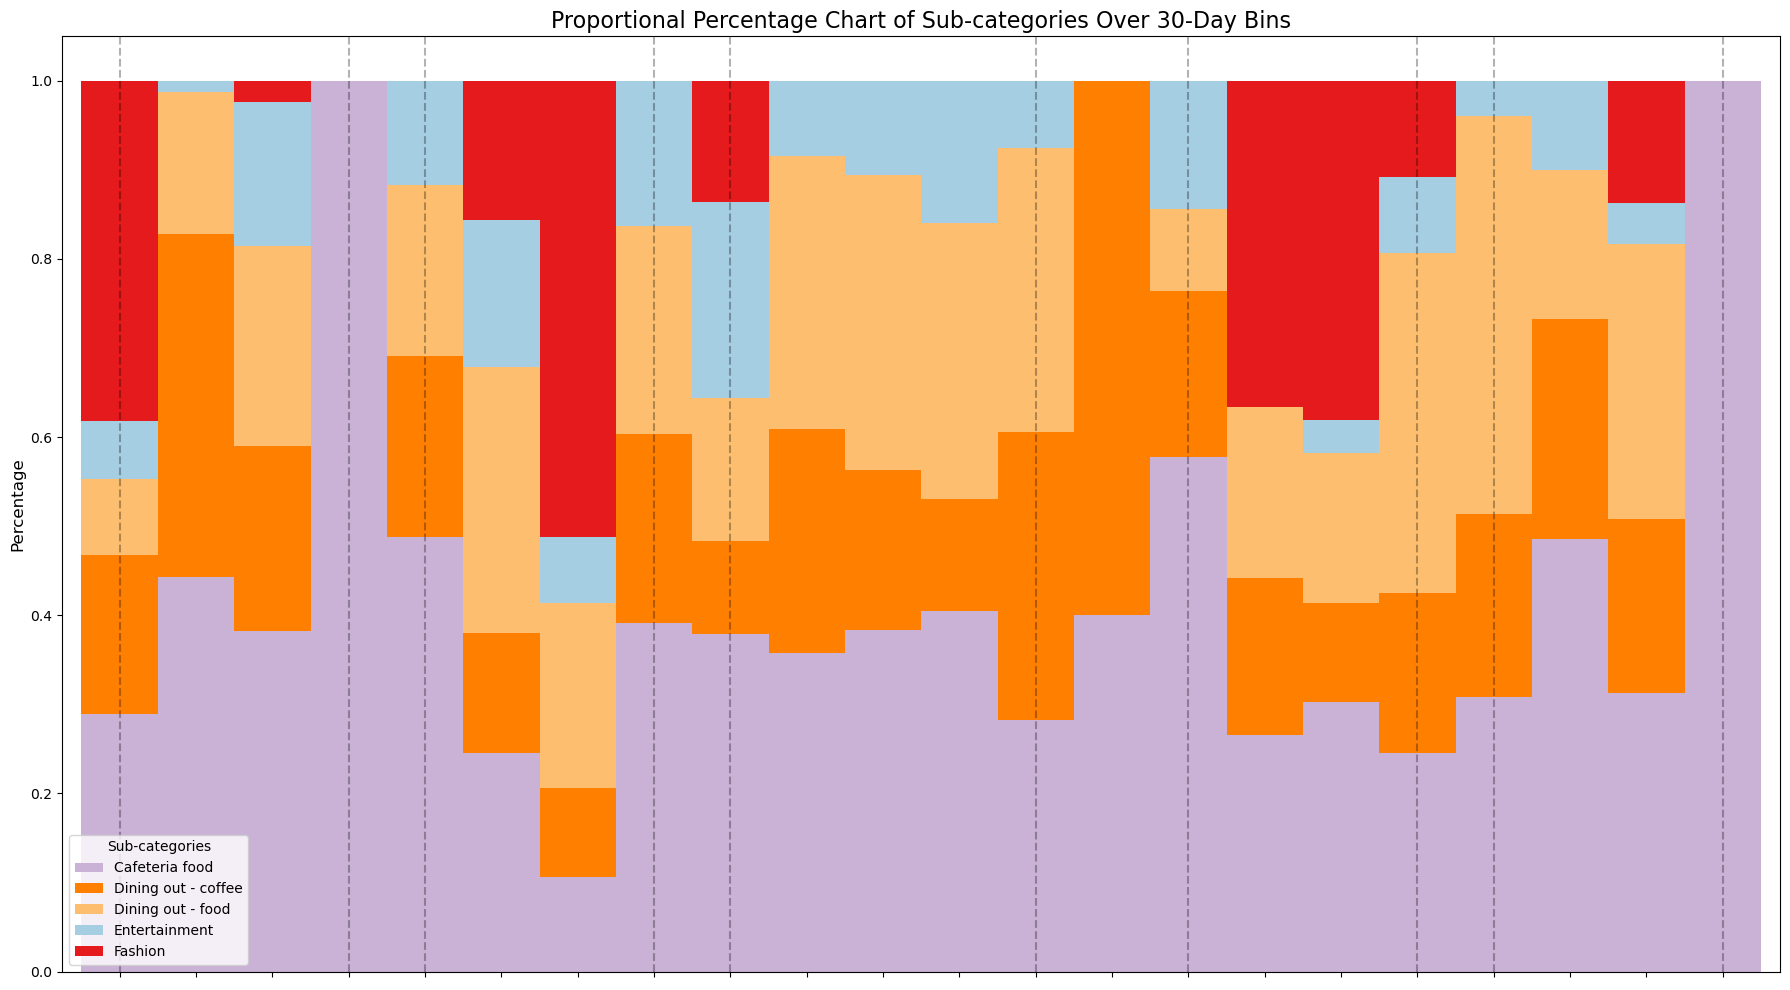

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_dayOfWeek.csv'
data = pd.read_csv(file_path)

# Parse the date and preprocess
data['Tarih'] = pd.to_datetime(data['Tarih'], errors='coerce')
data['Tutar'] = data['Tutar'].abs()

# Manually add favorite categories
favorite_categories = [
    'Cafeteria food', 'Entertainment', 'Dining out - coffee',
    'Market - grocery', 'Fashion', 'Dining out - food'
]
filtered_data = data[data['Sub-category'].isin(favorite_categories)]

# Add missing categories manually
for category in favorite_categories:
    if category not in filtered_data['Sub-category'].unique():
        placeholder_row = {
            'Tarih': pd.NaT,
            'Tutar': 0.0,
            'Sub-category': category,
        }
        filtered_data = pd.concat([filtered_data, pd.DataFrame([placeholder_row])], ignore_index=True)

# Define semester date ranges
semesters = [
    ("2022-11-01", "2023-01-21"),
    ("2023-02-16", "2023-06-14"),
    ("2023-10-01", "2024-01-27"),
    ("2024-02-15", "2024-06-14"),
    ("2024-09-25", "2024-12-14")
]

# Create bins of 30 days for each semester and calculate cumulative sums per sub-category
semester_bins = []
for start, end in semesters:
    semester_data = filtered_data[(filtered_data['Tarih'] >= start) & (filtered_data['Tarih'] <= end)]
    semester_data['30_day_bin'] = semester_data['Tarih'].dt.floor('30D')
    grouped = semester_data.groupby(['30_day_bin', 'Sub-category'])['Tutar'].sum().unstack(fill_value=0)
    semester_bins.append(grouped)

# Combine all semester data into one DataFrame
all_semesters_data = pd.concat(semester_bins).sort_index()

# Reset the index to ensure uniqueness
all_semesters_data = all_semesters_data.reset_index()

# Normalize each row to represent percentages
all_semesters_percentage = all_semesters_data.iloc[:, 1:].div(all_semesters_data.iloc[:, 1:].sum(axis=1), axis=0)

# Define a new custom color palette for better differentiation
new_custom_colors = {
    'Cafeteria food': '#cab2d6',  # Light Purple
    'Entertainment': '#a6cee3',  # Light Blue
    'Dining out - coffee': '#ff7f00',  # Orange
    'Market - grocery': '#cab2d6',  # Light Purple
    'Fashion': '#e41a1c',  # Red
    'Dining out - food': '#fdbf6f',  # Light Orange

}

# Plotting the proportional percentage chart
plt.figure(figsize=(15, 8))
ax = all_semesters_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 10),
    width=1.0,
    color=[new_custom_colors.get(col, '#7f7f7f') for col in all_semesters_percentage.columns],
    legend=True
)

# Remove x-axis tick labels (bin explanation)
ax.set_xticklabels([])

# Add vertical transparent lines at semester start and end points
semester_boundaries = []

# Use the original bins for semester boundary positions
bins_datetime = pd.to_datetime(all_semesters_data['30_day_bin'])

# Find the nearest bin for each semester boundary
for start, end in semesters:
    start_boundary = (bins_datetime - pd.Timestamp(start)).abs().idxmin()
    end_boundary = (bins_datetime - pd.Timestamp(end)).abs().idxmin()
    semester_boundaries.extend([start_boundary, end_boundary])

# Add vertical lines for each semester boundary
for boundary in sorted(set(semester_boundaries)):
    plt.axvline(x=boundary, color='black', linestyle='--', alpha=0.3)

# Set white background for consistency
plt.gca().set_facecolor('white')

# Customizing the plot
plt.title('Proportional Percentage Chart of Sub-categories Over 30-Day Bins', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('')  # No label for x-axis
plt.legend(title='Sub-categories', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
